# Información de los datos


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Carga de datos

1. Denifinir los directorios

In [2]:
train_dir = "/Users/inma/Desktop/tfg/datos/train"
test_dir = "/Users/inma/Desktop/tfg/datos/test"
val_dir = "/Users/inma/Desktop/tfg/datos/valid"

2. Establecer los generadores de imágenes

In [3]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255) # rescale = reducir la dimension
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

3. Extraer las imágenes de los directorios

In [4]:
train_data = train_gen.flow_from_directory(train_dir,
                                           target_size = (224,224), # nueva escalacion
                                           class_mode = "categorical", # la clase es categorica: melanoma
                                           batch_size = 64 # tamaño del lote 
                                          ) 
test_data = test_gen.flow_from_directory(test_dir,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           batch_size = 64
                                          )
val_data = val_gen.flow_from_directory(val_dir,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           batch_size = 64
                                          )

4. Información sobre los datos

Found 2000 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [5]:
print("Número de clases: ", train_data.num_classes)

Número de clases:  3


In [6]:
label_names = train_data.class_indices.values()
print(label_names)

dict_values([0, 1, 2])


In [7]:
image, label = train_data.next()

print(image.shape)
print(label.shape)

(64, 224, 224, 3)
(64, 3)


- 64 tamaño del lote
- Tamaño 224x224 píxeles
- 3 canales: colores RGB

Ejemplo de las imágenes cargadas:

/Users/inma/opt/anaconda3/envs/tfg/lib/python3.8/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


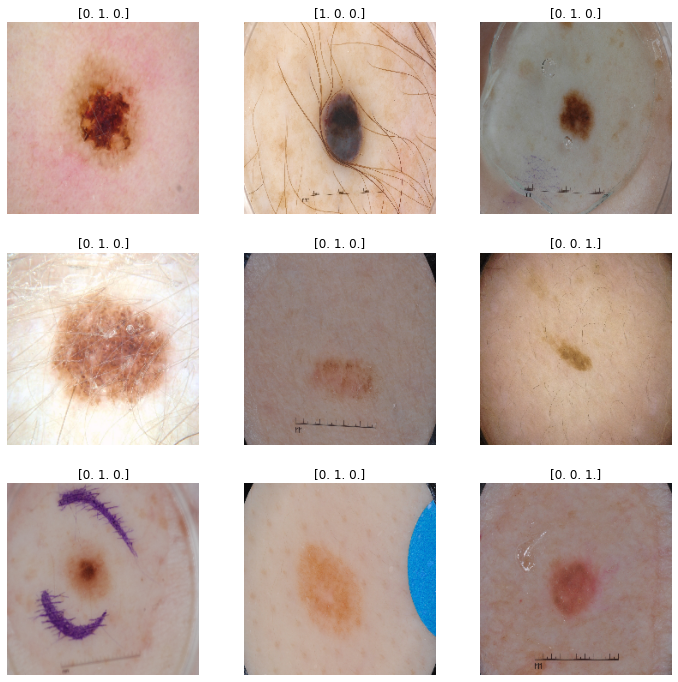

In [8]:
plt.figure(figsize= (12,12))

for i in range(9):
    image,label = train_data.next()
    plt.subplot(3,3, i+1)
    plt.imshow(image[i])
    plt.title(label[i])
    plt.axis("off")

# Comparar número de imágenes
### 1. Entrenamiento

In [9]:
import glob as gb

images_train_mel = gb.glob("/Users/inma/Desktop/tfg/datos/train/melanoma/*.jpg")
images_train_nev = gb.glob("/Users/inma/Desktop/tfg/datos/train/nevus/*.jpg")
images_train_seb = gb.glob("/Users/inma/Desktop/tfg/datos/train/seborrheic_keratosis/*.jpg")

In [10]:
print("Número de imágenes de melanoma en entrenamiento: ", len(images_train_mel))
print("Número de imágenes de nevus en entrenamiento: ", len(images_train_nev))
print("Número de imágenes de queratosis seborreica en entrenamiento: ", len(images_train_seb))


Número de imágenes de melanoma en entrenamiento:  374
Número de imágenes de nevus en entrenamiento:  1372
Número de imágenes de queratosis seborreica en entrenamiento:  254


In [11]:
total_train = len(images_train_mel)+len(images_train_nev)+len(images_train_seb)
print("Número de imágenes en entrenamiento: ", total_train)

Número de imágenes en entrenamiento:  2000


In [12]:
porc_train_mel = len(images_train_mel)*100/total_train
porc_train_nev = len(images_train_nev)*100/total_train
porc_train_seb = len(images_train_seb)*100/total_train

In [13]:
print("Porcentaje de imágenes de melanoma en entrenamiento: ", porc_train_mel)
print("Porcentaje de imágenes de nevus en entrenamiento: ", porc_train_nev)
print("Porcentaje de imágenes de queratosis seborreica en entrenamiento: ", porc_train_seb)

Porcentaje de imágenes de melanoma en entrenamiento:  18.7
Porcentaje de imágenes de nevus en entrenamiento:  68.6
Porcentaje de imágenes de queratosis seborreica en entrenamiento:  12.7


### 2. Validación

In [14]:
images_val_mel = gb.glob("/Users/inma/Desktop/tfg/datos/valid/melanoma/*.jpg")
images_val_nev = gb.glob("/Users/inma/Desktop/tfg/datos/valid/nevus/*.jpg")
images_val_seb = gb.glob("/Users/inma/Desktop/tfg/datos/valid/seborrheic_keratosis/*.jpg")

In [15]:
print("Número de imágenes de melanoma en validación: ", len(images_val_mel))
print("Número de imágenes de nevus en validación: ", len(images_val_nev))
print("Número de imágenes de queratosis seborreica en validación: ", len(images_val_seb))

Número de imágenes de melanoma en validación:  30
Número de imágenes de nevus en validación:  78
Número de imágenes de queratosis seborreica en validación:  42


In [16]:
total_val = len(images_val_mel)+len(images_val_nev)+len(images_val_seb)
print("Número de imágenes en validación: ", total_val)

Número de imágenes en validación:  150


In [17]:
porc_val_mel = len(images_val_mel)*100/total_val
porc_val_nev = len(images_val_nev)*100/total_val
porc_val_seb = len(images_val_seb)*100/total_val

In [18]:
print("Porcentaje de imágenes de melanoma en validación: ", porc_val_mel)
print("Porcentaje de imágenes de nevus en validación: ", porc_val_nev)
print("Porcentaje de imágenes de queratosis seborreica en validación: ", porc_val_seb)

Porcentaje de imágenes de melanoma en validación:  20.0
Porcentaje de imágenes de nevus en validación:  52.0
Porcentaje de imágenes de queratosis seborreica en validación:  28.0


### 3. Test

In [19]:
images_test_mel = gb.glob("/Users/inma/Desktop/tfg/datos/test/melanoma/*.jpg")
images_test_nev = gb.glob("/Users/inma/Desktop/tfg/datos/test/nevus/*.jpg")
images_test_seb = gb.glob("/Users/inma/Desktop/tfg/datos/test/seborrheic_keratosis/*.jpg")

In [20]:
print("Número de imágenes de melanoma en test: ", len(images_test_mel))
print("Número de imágenes de nevus en test: ", len(images_test_nev))
print("Número de imágenes de queratosis seborreica en test: ", len(images_test_seb))

Número de imágenes de melanoma en test:  117
Número de imágenes de nevus en test:  393
Número de imágenes de queratosis seborreica en test:  90


In [21]:
total_test = len(images_test_mel)+len(images_test_nev)+len(images_test_seb) 
print("Número de imágenes en test: ", total_test)

Número de imágenes en test:  600


In [22]:
porc_test_mel = len(images_test_mel)*100/total_test
porc_test_nev = len(images_test_nev)*100/total_test
porc_test_seb = len(images_test_seb)*100/total_test

In [23]:
print("Porcentaje de imágenes de melanoma en test: ", porc_test_mel)
print("Porcentaje de imágenes de nevus en test: ", porc_test_nev)
print("Porcentaje de imágenes de queratosis seborreica en test: ", porc_test_seb)

Porcentaje de imágenes de melanoma en test:  19.5
Porcentaje de imágenes de nevus en test:  65.5
Porcentaje de imágenes de queratosis seborreica en test:  15.0


## Comparación

In [24]:
total_mel = len(images_train_mel)+len(images_val_mel)+len(images_test_mel)
total_nev = len(images_train_nev)+len(images_val_nev)+len(images_test_nev)
total_seb = len(images_train_seb)+len(images_val_seb)+len(images_test_seb)

total = total_mel+total_nev+total_seb

porc_train = total_train*100/total
porc_val = total_val*100/total
porc_test = total_test*100/total

porc_mel = total_mel*100/total
porc_nev = total_nev*100/total
porc_seb = total_seb*100/total

print("Porcentaje de imágenes en entrenamiento: ", porc_train)
print("Porcentaje de imágenes en test: ", porc_val)
print("Porcentaje de imágenes en test: ", porc_test)

Porcentaje de imágenes en entrenamiento:  72.72727272727273
Porcentaje de imágenes en test:  5.454545454545454
Porcentaje de imágenes en test:  21.818181818181817


Crear las tablas:
1. Tabulate

In [25]:
from tabulate import tabulate

table_compar = [['Etapa', 'Melanoma', 'Nevus', 'Keratosis', 'Total etapa'], 
         ['Train', len(images_train_mel), len(images_train_nev), len(images_test_seb), total_train],
         ['Val', len(images_val_mel), len(images_val_mel), len(images_val_mel), total_val], 
         ['Test', len(images_test_mel), len(images_test_mel), len(images_test_mel), total_test],
        ['Total tipo', total_mel, total_nev, total_seb, total]]

table_compar_porc = [['Etapa', 'Melanoma', 'Nevus', 'Keratosis', 'Total etapa'], 
         ['Train', porc_train_mel, porc_train_nev, porc_train_seb, porc_train],
         ['Val', porc_val_mel, porc_val_nev, porc_val_seb, porc_val], 
         ['Test', porc_test_mel, porc_test_nev, porc_test_seb, porc_test],
        ['Total tipo', porc_mel, porc_nev, porc_seb, ' ']]

In [26]:
print("Número de imágenes de cada tipo:")
print(tabulate(table_compar, headers='firstrow', tablefmt='fancy_grid', stralign='center'))
print(" ")
print("Porcentaje de imágenes de cada tipo:")
print(tabulate(table_compar_porc, headers='firstrow', tablefmt='fancy_grid', stralign='center'))

Número de imágenes de cada tipo:
╒════════════╤════════════╤═════════╤═════════════╤═══════════════╕
│   Etapa    │   Melanoma │   Nevus │   Keratosis │   Total etapa │
╞════════════╪════════════╪═════════╪═════════════╪═══════════════╡
│   Train    │        374 │    1372 │          90 │          2000 │
├────────────┼────────────┼─────────┼─────────────┼───────────────┤
│    Val     │         30 │      30 │          30 │           150 │
├────────────┼────────────┼─────────┼─────────────┼───────────────┤
│    Test    │        117 │     117 │         117 │           600 │
├────────────┼────────────┼─────────┼─────────────┼───────────────┤
│ Total tipo │        521 │    1843 │         386 │          2750 │
╘════════════╧════════════╧═════════╧═════════════╧═══════════════╛
 
Porcentaje de imágenes de cada tipo:
╒════════════╤════════════╤═════════╤═════════════╤════════════════════╕
│   Etapa    │   Melanoma │   Nevus │   Keratosis │    Total etapa     │
╞════════════╪════════════╪═══════

2. DataFrame

In [39]:
melanoma = [len(images_train_mel), len(images_val_mel), len(images_test_mel), total_mel]
nevus = [len(images_train_nev), len(images_val_nev), len(images_test_nev), total_nev]
keratosis = [len(images_train_seb), len(images_val_seb), len(images_test_seb), total_seb]
total_etapa = [total_train, total_val, total_test, total]

melanoma_porc = [porc_train_mel, porc_val_mel, porc_test_mel, porc_mel]
nevus_porc = [porc_train_nev, porc_val_nev, porc_test_nev, porc_nev]
keratosis_porc = [porc_train_seb, porc_val_seb, porc_test_seb, porc_seb]
total_etapa_porc = [porc_train, porc_val, porc_test, '100']

df_comparacion = pd.DataFrame(list(zip(melanoma, nevus, keratosis, total_etapa)), columns = ['Melanoma', 'Nevus', 'Keratosis', 'Total Etapa'])
df_comparacion.index = ['Entrenamiento', 'Validación', 'Test', 'Total Tipo']

df_comp_porc = pd.DataFrame(list(zip(melanoma_porc, nevus_porc, keratosis_porc, total_etapa_porc)), columns = ['Melanoma', 'Nevus', 'Keratosis', 'Total Etapa'])
df_comp_porc.index = ['Entrenamiento', 'Validación', 'Test', 'Total Tipo']

In [40]:
df_comparacion

,Melanoma,Nevus,Keratosis,Total Etapa
Entrenamiento,374,1372,254,2000
Validación,30,78,42,150
Test,117,393,90,600
Total Tipo,521,1843,386,2750


In [41]:
df_comp_porc

,Melanoma,Nevus,Keratosis,Total Etapa
Entrenamiento,18.700000,68.600000,12.700000,72.727273
Validación,20.000000,52.000000,28.000000,5.454545
Test,19.500000,65.500000,15.000000,21.818182
Total Tipo,18.945455,67.018182,14.036364,100


#### Guardar tablas

In [42]:
df_comparacion.to_csv("resultados/01-tabla_numero_images.csv")
df_comp_porc.to_csv("resultados/02-tabla_porcentaje_imagenes.csv")

### Gráficas
1. Porcentaje de imágenes en cada etapa

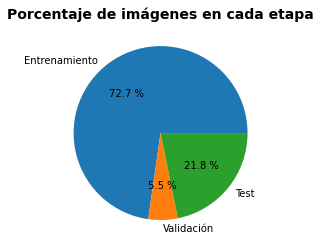

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie([total_train, total_val, total_test], labels=["Entrenamiento", "Validación", "Test"], autopct="%0.1f %%")
ax.set_title('Porcentaje de imágenes en cada etapa', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.savefig("resultados/03-grafica_queso_porcentaje_imagenes.png")
plt.show()

2. Número de imágenes en cada etapa

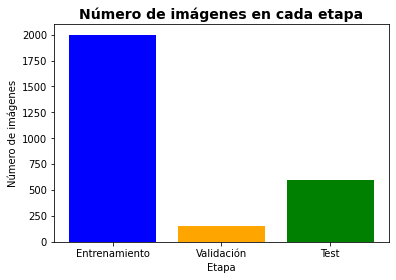

In [44]:
fig, ax = plt.subplots()
ax.bar(["Entrenamiento", "Validación", "Test"], [total_train, total_val, total_test], color=['blue', 'orange', 'green'])
ax.set_title('Número de imágenes en cada etapa', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.xlabel('Etapa')
plt.ylabel('Número de imágenes')
plt.savefig("resultados/04-grafica_barras_imagenes_etapa.png")
plt.show()

3. Número de imágenes por etapa y tipo

In [45]:
numero_de_grupos = 3
indice_barras = np.arange(numero_de_grupos)
ancho_barras = 0.3

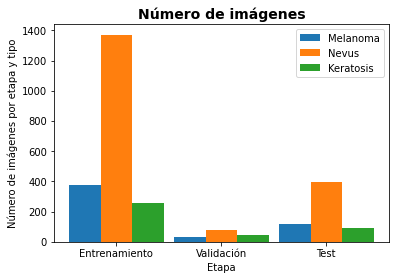

In [46]:
fig, ax = plt.subplots()

ax.bar(indice_barras, [len(images_train_mel), len(images_val_mel), len(images_test_mel)], width=ancho_barras, label = "Melanoma")
ax.bar(indice_barras + ancho_barras, [len(images_train_nev), len(images_val_nev), len(images_test_nev)], width=ancho_barras, label = "Nevus")
ax.bar(indice_barras + 2*ancho_barras, [len(images_train_seb), len(images_val_seb), len(images_test_seb)], width=ancho_barras, label = "Keratosis")

plt.legend(loc='best')
plt.xticks(indice_barras + ancho_barras, ("Entrenamiento", "Validación", "Test"))

ax.set_title('Número de imágenes', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.xlabel('Etapa')
plt.ylabel('Número de imágenes por etapa y tipo')
plt.savefig("resultados/05-grafica_barras_imagenes_etapa_tipo.png")
plt.show()

# Nuevo reparto de datos

In [47]:
new_train_mel = int(0.6*total_mel)+1
new_val_mel = int(0.2*total_mel)
new_test_mel = int(0.2*total_mel)

new_train_nev = int(0.6*total_nev)+2
new_val_nev = int(0.2*total_nev)
new_test_nev = int(0.2*total_nev)

new_train_seb = int(0.6*total_seb)+1
new_val_seb = int(0.2*total_seb)
new_test_seb = int(0.2*total_seb)

new_melanoma = [new_train_mel, new_val_mel, new_test_mel, total_mel]
new_nevus = [new_train_nev, new_val_nev, new_test_nev, total_nev]
new_keratosis = [new_train_seb, new_val_seb, new_test_seb, total_seb]

new_total_train = new_train_mel+new_train_nev+new_train_seb
new_total_val = new_val_mel+new_val_nev+new_val_seb
new_total_test = new_test_mel+new_test_nev+new_test_seb

new_total_etapa = [new_total_train, new_total_val, new_total_test, total]

In [48]:
new_df = pd.DataFrame(list(zip(new_melanoma, new_nevus, new_keratosis, new_total_etapa)), columns = ['Melanoma', 'Nevus', 'Keratosis', 'Total Etapa'])
new_df.index = ['Entrenamiento', 'Validación', 'Test', 'Total Tipo']

In [49]:
new_df

,Melanoma,Nevus,Keratosis,Total Etapa
Entrenamiento,313,1107,232,1652
Validación,104,368,77,549
Test,104,368,77,549
Total Tipo,521,1843,386,2750


In [50]:
df_comparacion

,Melanoma,Nevus,Keratosis,Total Etapa
Entrenamiento,374,1372,254,2000
Validación,30,78,42,150
Test,117,393,90,600
Total Tipo,521,1843,386,2750


#### Guardar nuevo reparto de datos

In [51]:
new_df.to_csv("resultados/06-tabla_nuevo_reparto_datos.csv")

### Nuevas gráficas de reparto de datos
1. Porcentaje de imágenes en cada etapa

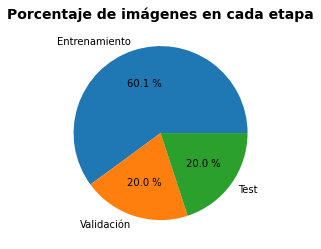

In [52]:
fig, ax = plt.subplots()
ax.pie([new_total_train, new_total_val, new_total_test], labels=["Entrenamiento", "Validación", "Test"], autopct="%0.1f %%")
ax.set_title('Porcentaje de imágenes en cada etapa', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.savefig("resultados/07-grafica_queso_nuevo_porcentaje_imagenes.png")
plt.show()

2. Número de imágenes en cada etapa

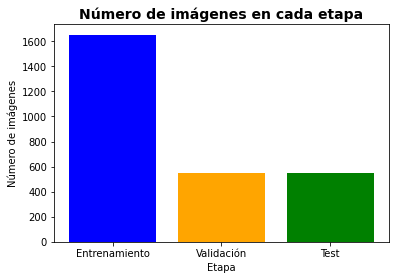

In [53]:
fig, ax = plt.subplots()
ax.bar(["Entrenamiento", "Validación", "Test"], [new_total_train, new_total_val, new_total_test], color=['blue', 'orange', 'green'])
ax.set_title('Número de imágenes en cada etapa', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.xlabel('Etapa')
plt.ylabel('Número de imágenes')
plt.savefig("resultados/08-grafica_barras_nuevo_imagenes_etapa.png")
plt.show()

3. Número de imágenes por etapa y tipo

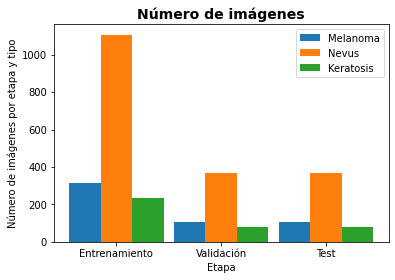

In [54]:
fig, ax = plt.subplots()

ax.bar(indice_barras, [new_train_mel, new_val_mel, new_test_mel], width=ancho_barras, label = "Melanoma")
ax.bar(indice_barras + ancho_barras, [new_train_nev, new_val_nev, new_test_nev], width=ancho_barras, label = "Nevus")
ax.bar(indice_barras + 2*ancho_barras, [new_train_seb, new_val_seb, new_test_seb], width=ancho_barras, label = "Keratosis")

plt.legend(loc='best')
plt.xticks(indice_barras + ancho_barras, ("Entrenamiento", "Validación", "Test"))

ax.set_title('Número de imágenes', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.xlabel('Etapa')
plt.ylabel('Número de imágenes por etapa y tipo')
plt.savefig("resultados/09-grafica_barras_nuevo_imagenes_etapa_tipo.png")
plt.show()

Sigue habiendo mucha descompensación.